In [44]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataframe = pd.read_csv('Housing_Activity_1_2.csv')
dataframe

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
dataframe.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
dataframe.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
dataframe.mainroad.replace({'yes':1, 'no':0},inplace=True)
dataframe.guestroom.replace({'yes':1, 'no':0},inplace=True)
dataframe.basement.replace({'yes':1, 'no':0},inplace=True)
dataframe.hotwaterheating.replace({'yes':1, 'no':0},inplace=True)
dataframe.airconditioning.replace({'yes':1, 'no':0},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12732\3717004491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe.mainroad.replace({'yes':1, 'no':0},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12732\3717004491.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.mai

In [8]:
dataframe.prefarea.replace({'yes':1, 'no':0},inplace=True)
dataframe.furnishingstatus.replace({'furnished':2, 'semi-furnished':1, 'unfurnished':0 },inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12732\1348657103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe.prefarea.replace({'yes':1, 'no':0},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12732\1348657103.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.pre

In [10]:
correlation = dataframe.corr(method = 'pearson')
correlation

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


<Axes: >

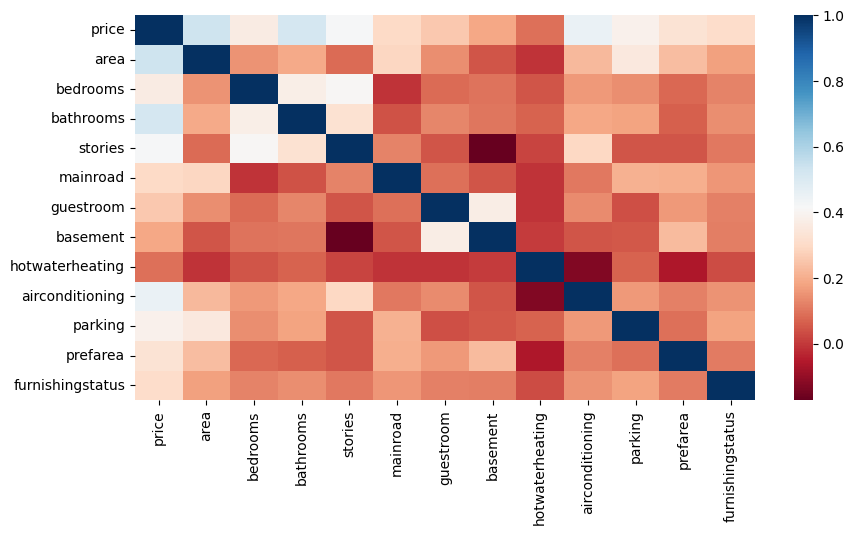

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(correlation, cmap = 'RdBu')

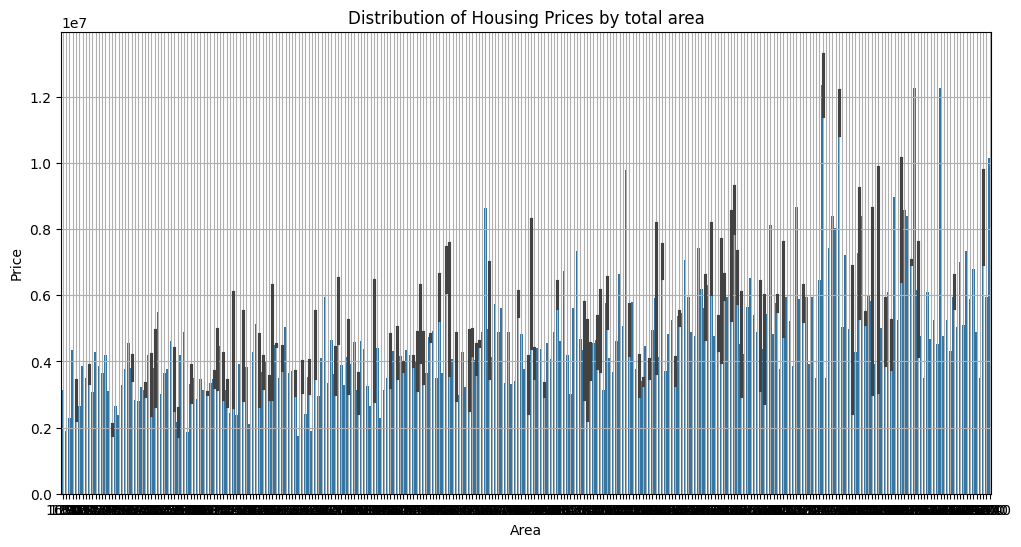

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='area', y='price', data=dataframe)
plt.title('Distribution of Housing Prices by total area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

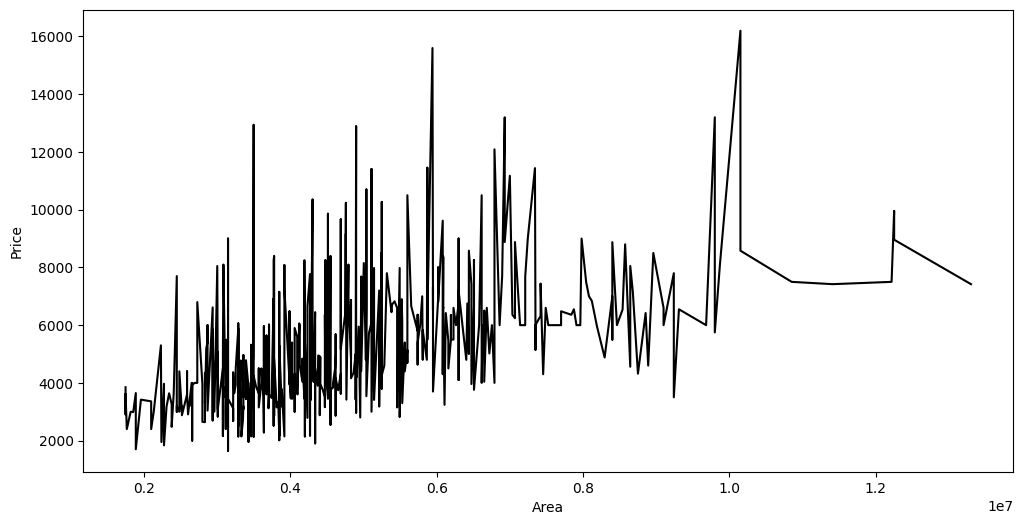

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(dataframe.price,dataframe.area, color="black")
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [45]:
x = dataframe[['price']]
y = dataframe['area'] 
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [46]:
r2_score = model.score(x, y)
print(r2_score, 'This Regression score is not very coorelated')

0.2872931546811469 This Regression score is not very coorelated
